<a href="https://colab.research.google.com/github/furby990/1.4_list_dict_set_comprehensionweek2lab1/blob/main/data_cleaning_pandas_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data-cleaning-pandas

In [ ]:
import pandas as pd
import numpy as np

url = "https://drive.google.com/uc?export=download&id=1ric-zPEfm4E1weBBu5m0RRTOtiyTb3br"

df = pd.read_csv(url)
df.head()


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,20th January,2026,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19th January,2026,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19th January,2026,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,...,5m shark species not determined,9 News: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18th January,2026,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10th January,2026,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Check the data types for the cilums:
df.dtypes


In [ ]:
#Show the number of columns and row:
df.shape

(7070, 25)

In [ ]:
# Create a cleaned copy of the Date column
# - Remove leading/trailing spaces
# - Remove ordinal suffixes: st, nd, rd, th
df['Date_clean'] = (df['Date'].astype(str).str.strip().str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True))

# Add the year from the Year column >> When you convert "20 January" to a datetime using pd.to_datetime,
#pandas needs a year to create a proper datetime object.
df['Date_clean'] = df['Date_clean'] + ' ' + df['Year'].astype(str)

# Convert cleaned dates to datetime
df['Date_clean'] = pd.to_datetime(df['Date_clean'], errors='coerce')

# Extract the month name
df['Month'] = df['Date_clean'].dt.month_name()


In [ ]:
# Count rows where Month is missing and present:
missing_months = df['Month'].isna().sum()
in_months = df['Month'].notna().sum()

print(f"Number of rows with undefined Month: {missing_months}")
print(f"Number of rows with in Month:": {in_months}")

SyntaxError: unterminated string literal (detected at line 6) (ipython-input-3197534643.py, line 6)

In [ ]:
df.describe(include="object").T

,count,unique,top,freq
Date,7070,6080,1957,11
Year,7068,262,2015,141
Type,7052,13,Unprovoked,5221
Country,7020,251,USA,2578
State,6583,944,Florida,1192
Location,6503,4616,"New Smyrna Beach, Volusia County",191
Activity,6485,1610,Surfing,1146
Name,6851,5789,male,679
Sex,6491,10,M,5670
Age,4075,177,17,174


Comments :

Date: change the data type from float

Year: change from float to int

Type: OK

Country: 1 - Check the empty cells ; 2 - Check uppercase or lowercase ; 3 - Clean duplicates

State: 1 - Check the empty cells ; 2 - Check uppercase or lowercase

Location: 1 - Check the empty cells ; 2 - Check uppercase or lowercase

Activity: 1 - Check the empty cells ; 2 - Check uppercase or lowercase

Name: clean names as well

Sex: 10 different uniques (clean)

Age: 1 - Check the empty cells ; 2 - Clean exclamation marks

Injury: ? check the emty cells

Fatal Y/N: clean other options except Yes/No/Unknown

Time:change the datatime from object >> to other datatype

Species: 1 - check the wrighting with spaces or without, uppercases etc.

Source:


Check the empty cells
Check uppercase or lowercase
Clean duplicates

Conclusion: should be summarized & formalized and clean; manage the errors cused by "?" or other marks

**Second, we have to clean and transform the "Country" column data. **


In [ ]:
#First we create an uppercase list to have every "Country" in uppecarse (it will be easier to clean)
df["Country_uppercase"] = df["Country"].astype(str).str.strip().str.upper()

In [ ]:
#We create a dictionary with the all countries, how it is written and how it should be written. The key is the previous country, and the value is the "new country column"
country_dict = {
    "AUSTRALIA": "AUSTRALIA",
    "US VIRGIN ISLANDS": "UNITED STATES",
    "NEW CALEDONIA": "FRANCE",
    "USA": "UNITED STATES",
    "FRENCH POLYNESIA": "FRANCE",
    "SAMOA": "SAMOA",
    "COLUMBIA": "COLOMBIA",
    "COSTA RICA": "COSTA RICA",
    "BAHAMAS": "BAHAMAS",
    "PUERTO RICO": "UNITED STATES",
    "SPAIN": "SPAIN",
    "CANARY ISLANDS": "SPAIN",
    "SOUTH AFRICA": "SOUTH AFRICA",
    "VANUATU": "VANUATU",
    "JAMAICA": "JAMAICA",
    "ISRAEL": "ISRAEL",
    "MEXICO": "MEXICO",
    "MALDIVES": "MALDIVES",
    "PHILIPPINES": "PHILIPPINES",
    "TURKS AND CAICOS": "UNITED KINGDOM",
    "MOZAMBIQUE": "MOZAMBIQUE",
    "EGYPT": "EGYPT",
    "THAILAND": "THAILAND",
    "NEW ZEALAND": "NEW ZEALAND",
    "HAWAII": "UNITED STATES",
    "HONDURAS": "HONDURAS",
    "INDONESIA": "INDONESIA",
    "MOROCCO": "MOROCCO",
    "BELIZE": "BELIZE",
    "MALDIVE ISLANDS": "MALDIVES",
    "TOBAGO": "TRINIDAD AND TOBAGO",
    "INDIA": "INDIA",
    "TRINIDAD": "TRINIDAD AND TOBAGO",
    "CORAL SEA": None,
    "PORTUGAL": "PORTUGAL",
    "COLOMBIA": "COLOMBIA",
    "ECUADOR": "ECUADOR",
    "CUBA": "CUBA",
    "BRAZIL": "BRAZIL",
    "SEYCHELLES": "SEYCHELLES",
    "ARGENTINA": "ARGENTINA",
    "FIJI": "FIJI",
    "ENGLAND": "UNITED KINGDOM",
    "JAPAN": "JAPAN",
    "BRITISH OVERSEAS TERRITORY": "UNITED KINGDOM",
    "CANADA": "CANADA",
    "JORDAN": "JORDAN",
    "ST KITTS / NEVIS": "SAINT KITTS AND NEVIS",
    "ST MARTIN": "FRANCE",
    "PAPUA NEW GUINEA": "PAPUA NEW GUINEA",
    "REUNION ISLAND": "FRANCE",
    "CHINA": "CHINA",
    "IRELAND": "IRELAND",
    "ITALY": "ITALY",
    "MALAYSIA": "MALAYSIA",
    "LIBYA": "LIBYA",
    "NAN": None,
    "MAURITIUS": "MAURITIUS",
    "SOLOMON ISLANDS": "SOLOMON ISLANDS",
    "ST HELENA, BRITISH OVERSEAS TERRITORY": "UNITED KINGDOM",
    "COMOROS": "COMOROS",
    "REUNION": "FRANCE",
    "UNITED KINGDOM": "UNITED KINGDOM",
    "UNITED ARAB EMIRATES": "UNITED ARAB EMIRATES",
    "CAPE VERDE": "CAPE VERDE",
    "DOMINICAN REPUBLIC": "DOMINICAN REPUBLIC",
    "CAYMAN ISLANDS": "UNITED KINGDOM",
    "ARUBA": "NETHERLANDS",
    "ATLANTIC OCEAN": None,
    "GREECE": "GREECE",
    "ST. MARTIN": "FRANCE",
    "FRANCE": "FRANCE",
    "TRINIDAD & TOBAGO": "TRINIDAD AND TOBAGO",
    "KIRIBATI": "KIRIBATI",
    "DIEGO GARCIA": "UNITED KINGDOM",
    "TAIWAN": "TAIWAN",
    "PALESTINIAN TERRITORIES": "PALESTINE",
    "GUAM": "UNITED STATES",
    "NIGERIA": "NIGERIA",
    "TONGA": "TONGA",
    "SCOTLAND": "UNITED KINGDOM",
    "CROATIA": "CROATIA",
    "SAUDI ARABIA": "SAUDI ARABIA",
    "CHILE": "CHILE",
    "ANTIGUA": "ANTIGUA AND BARBUDA",
    "KENYA": "KENYA",
    "RUSSIA": "RUSSIA",
    "TURKS & CAICOS": "UNITED KINGDOM",
    "UNITED ARAB EMIRATES (UAE)": "UNITED ARAB EMIRATES",
    "AZORES": "PORTUGAL",
    "SOUTH KOREA": "SOUTH KOREA",
    "MALTA": "MALTA",
    "VIETNAM": "VIETNAM",
    "MADAGASCAR": "MADAGASCAR",
    "PANAMA": "PANAMA",
    "SOMALIA": "SOMALIA",
    "NEVIS": "SAINT KITTS AND NEVIS",
    "BRITISH VIRGIN ISLANDS": "UNITED KINGDOM",
    "NORWAY": "NORWAY",
    "SENEGAL": "SENEGAL",
    "YEMEN": "YEMEN",
    "GULF OF ADEN": None,
    "SIERRA LEONE": "SIERRA LEONE",
    "ST. MAARTIN": "NETHERLANDS",
    "GRAND CAYMAN": "UNITED KINGDOM",
    "LIBERIA": "LIBERIA",
    "VENEZUELA": "VENEZUELA",
    "SRI LANKA": "SRI LANKA",
    "URUGUAY": "URUGUAY",
    "MICRONESIA": "MICRONESIA",
    "CARIBBEAN SEA": None,
    "OKINAWA": "JAPAN",
    "TANZANIA": "TANZANIA",
    "MARSHALL ISLANDS": "MARSHALL ISLANDS",
    "EGYPT / ISRAEL": "EGYPT",
    "NORTHERN ARABIAN SEA": None,
    "HONG KONG": "CHINA",
    "EL SALVADOR": "EL SALVADOR",
    "ANGOLA": "ANGOLA",
    "BERMUDA": "UNITED KINGDOM",
    "MONTENEGRO": "MONTENEGRO",
    "IRAN": "IRAN",
    "TUNISIA": "TUNISIA",
    "NAMIBIA": "NAMIBIA",
    "NORTH ATLANTIC OCEAN": None,
    "SOUTH CHINA SEA": None,
    "BANGLADESH": "BANGLADESH",
    "PALAU": "PALAU",
    "WESTERN SAMOA": "SAMOA",
    "PACIFIC OCEAN": None,
    "BRITISH ISLES": "UNITED KINGDOM",
    "GRENADA": "GRENADA",
    "IRAQ": "IRAQ",
    "TURKEY": "TURKEY",
    "SINGAPORE": "SINGAPORE",
    "NEW BRITAIN": "PAPUA NEW GUINEA",
    "SUDAN": "SUDAN",
    "JOHNSTON ISLAND": "UNITED STATES",
    "SOUTH PACIFIC OCEAN": None,
    "NEW GUINEA": "PAPUA NEW GUINEA",
    "RED SEA": None,
    "NORTH PACIFIC OCEAN": None,
    "FEDERATED STATES OF MICRONESIA": "MICRONESIA",
    "MID ATLANTIC OCEAN": None,
    "ADMIRALTY ISLANDS": "PAPUA NEW GUINEA",
    "BRITISH WEST INDIES": "UNITED KINGDOM",
    "SOUTH ATLANTIC OCEAN": None,
    "PERSIAN GULF": None,
    "RED SEA / INDIAN OCEAN": None,
    "NORTH SEA": None,
    "NICARAGUA": "NICARAGUA",
    "AMERICAN SAMOA": "UNITED STATES",
    "ANDAMAN / NICOBAR ISLANDAS": "INDIA",
    "GABON": "GABON",
    "MAYOTTE": "FRANCE",
    "THE BALKANS": None,
    "SUDAN?": "SUDAN",
    "MARTINIQUE": "FRANCE",
    "INDIAN OCEAN": None,
    "GUATEMALA": "GUATEMALA",
    "NETHERLANDS ANTILLES": "NETHERLANDS",
    "NORTHERN MARIANA ISLANDS": "UNITED STATES",
    "IRAN / IRAQ": "IRAN",
    "JAVA": "INDONESIA",
    "CENTRAL PACIFIC": None,
    "SOLOMON ISLANDS / VANUATU": "VANUATU",
    "SOUTHWEST PACIFIC OCEAN": None,
    "BAY OF BENGAL": None,
    "MID-PACIFC OCEAN": None,
    "SLOVENIA": "SLOVENIA",
    "CURACAO": "NETHERLANDS",
    "ICELAND": "ICELAND",
    "ITALY / CROATIA": "ITALY",
    "BARBADOS": "BARBADOS",
    "MONACO": "MONACO",
    "GUYANA": "GUYANA",
    "HAITI": "HAITI",
    "SAN DOMINGO": "DOMINICAN REPUBLIC",
    "KUWAIT": "KUWAIT",
    "FALKLAND ISLANDS": "UNITED KINGDOM",
    "CRETE": "GREECE",
    "CYPRUS": "CYPRUS",
    "WEST INDIES": None,
    "BURMA": "MYANMAR",
    "LEBANON": "LEBANON",
    "PARAGUAY": "PARAGUAY",
    "BRITISH NEW GUINEA": "PAPUA NEW GUINEA",
    "CEYLON": "SRI LANKA",
    "OCEAN": None,
    "GEORGIA": "GEORGIA",
    "SYRIA": "SYRIA",
    "TUVALU": "TUVALU",
    "INDIAN OCEAN?": None,
    "GUINEA": "GUINEA",
    "ANDAMAN ISLANDS": "INDIA",
    "EQUATORIAL GUINEA / CAMEROON": "EQUATORIAL GUINEA",
    "COOK ISLANDS": "NEW ZEALAND",
    "PERU": "PERU",
    "AFRICA": None,
    "ALGERIA": "ALGERIA",
    "COAST OF AFRICA": None,
    "TASMAN SEA": None,
    "GHANA": "GHANA",
    "GREENLAND": "DENMARK",
    "MEDITERRANEAN SEA": None,
    "SWEDEN": "SWEDEN",
    "ROATAN": "HONDURAS",
    "BETWEEN PORTUGAL & INDIA": None,
    "DJIBOUTI": "DJIBOUTI",
    "BAHREIN": "BAHRAIN",
    "KOREA": "SOUTH KOREA",
    "RED SEA?": None,
    "ASIA?": None,
    "CEYLON (SRI LANKA)": "SRI LANKA"
}

In [ ]:
#With "map", we will take the values from country_uppercase, and if the value is in "country_dict", it will return the new value to the column "country_new"
df["Country_new"] = df["Country_uppercase"].map(country_dict)

In [ ]:
#Here we can see the column with country_new data. It can be observed that we have now 6908 rows, however, at the begining we had 7070 rows.
df[df["Country_new"].notna()]["Country_new"]

,Country_new
0,AUSTRALIA
1,AUSTRALIA
2,AUSTRALIA
3,AUSTRALIA
4,AUSTRALIA
...,...
7065,AUSTRALIA
7066,AUSTRALIA
7067,UNITED STATES
7068,PANAMA


In [ ]:
#Here we can see locations that not correspond to a country.
df[df["Country_new"].isna()]["Country_uppercase"].unique()

array(['CORAL SEA', 'NAN', 'ATLANTIC OCEAN', 'GULF OF ADEN',
       'CARIBBEAN SEA', 'NORTHERN ARABIAN SEA', 'NORTH ATLANTIC OCEAN',
       'SOUTH CHINA SEA', 'PACIFIC OCEAN', 'SOUTH PACIFIC OCEAN',
       'RED SEA', 'NORTH PACIFIC OCEAN', 'MID ATLANTIC OCEAN',
       'SOUTH ATLANTIC OCEAN', 'PERSIAN GULF', 'RED SEA / INDIAN OCEAN',
       'NORTH SEA', 'THE BALKANS', 'INDIAN OCEAN', 'CENTRAL PACIFIC',
       'SOUTHWEST PACIFIC OCEAN', 'BAY OF BENGAL', 'MID-PACIFC OCEAN',
       'WEST INDIES', 'OCEAN', 'INDIAN OCEAN?', 'AFRICA',
       'COAST OF AFRICA', 'TASMAN SEA', 'MEDITERRANEAN SEA',
       'BETWEEN PORTUGAL & INDIA', 'RED SEA?', 'ASIA?'], dtype=object)

In [ ]:
df


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22,Date_clean,Month,country_uppercase,country_new
0,20th January,2026,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,NaN,NaN,NaN,NaN,NaN,NaN,2026-01-20,January,AUSTRALIA,AUSTRALIA
1,19th January,2026,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,NaN,NaN,NaN,NaN,NaN,NaN,2026-01-19,January,AUSTRALIA,AUSTRALIA
2,19th January,2026,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,...,NaN,NaN,NaN,NaN,NaN,NaN,2026-01-19,January,AUSTRALIA,AUSTRALIA
3,18th January,2026,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,...,NaN,NaN,NaN,NaN,NaN,NaN,2026-01-18,January,AUSTRALIA,AUSTRALIA
4,10th January,2026,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,...,NaN,NaN,NaN,NaN,NaN,NaN,2026-01-10,January,AUSTRALIA,AUSTRALIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7065,Before 1903,0000,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN,NaT,NaN,AUSTRALIA,AUSTRALIA
7066,Before 1903,0000,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN,NaT,NaN,AUSTRALIA,AUSTRALIA
7067,1900-1905,0000,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN,NaT,NaN,USA,UNITED STATES
7068,1883-1889,0000,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN,NaT,NaN,PANAMA,PANAMA


Now we have to clean Fatal Y/N column.

In [ ]:
#First we have to convert every data to uppercase (as we did with country)
df["Fatal_uppercase"] = df["Fatal Y/N"].astype(str).str.strip().str.upper()

In [ ]:
#we check the changes
df[["Fatal_uppercase", "Fatal Y/N"]]

,Fatal_uppercase,Fatal Y/N
0,N,N
1,N,N
2,N,N
3,Y,Y
4,N,N
...,...,...
7065,Y,Y
7066,Y,Y
7067,Y,Y
7068,Y,Y


In [ ]:
#Now, we have to check the unique values for fatal_uppercase
df["Fatal_uppercase"].unique()


array(['N', 'Y', 'F', 'M', 'NAN', 'NQ', 'UNKNOWN', '2017', 'Y X 2'],
      dtype=object)

In [ ]:
#Now, we create a dictionary to create only 3 values: Y, N or UNKNOWN
fatal_dict = {
    "Y": "Y",
    "YES": "Y",
    "FATAL": "Y",
    "1": "Y",

    "N": "N",
    "NO": "N",
    "NON-FATAL": "N",
    "0": "N",

    "UNKNOWN": None,
    "?": None,
    "NA": None,
    "N/A": None,
    "NONE": None,
    "": None
}


In [ ]:
#create the new column for fatal Y/N
df["Fatal_clean"] = df["Fatal_uppercase"].map(fatal_dict)


In [ ]:
#We can see that we only have 6427 rows with data (not 7070 as the begining)
df[df["Fatal_clean"].notna()][["Fatal_uppercase", "Fatal_clean"]]

,Fatal_uppercase,Fatal_clean
0,N,N
1,N,N
2,N,N
3,Y,Y
4,N,N
...,...,...
7065,Y,Y
7066,Y,Y
7067,Y,Y
7068,Y,Y


Now, we will check: THE FIRST 10 COUNTRYS WITH + FATAL CASES.

In [ ]:
#First of all, we filter for the Y fatal cases:
fatal_cases = df[df["Fatal_clean"] == "Y"]

print(fatal_cases)



                Date  Year        Type             Country  \
3       18th January  2026  Unprovoked           Australia   
5        8th January  2026  Unprovoked   US Virgin Islands   
8      21st December  2025  Unprovoked                 USA   
12    27th November   2025  Unprovoked           Australia   
23     6th September  2025  Unprovoked           Australia   
...              ...   ...         ...                 ...   
7065     Before 1903  0000  Unprovoked           AUSTRALIA   
7066     Before 1903  0000  Unprovoked           AUSTRALIA   
7067       1900-1905  0000  Unprovoked                 USA   
7068       1883-1889  0000  Unprovoked              PANAMA   
7069       1845-1853  0000  Unprovoked  CEYLON (SRI LANKA)   

                             State                              Location  \
3                              NSW  Nielsen Park Vaucluse Sydney Harbour   
5     Fredricksted Island St Croix                          Dorsch Beach   
8                       Cal

In [ ]:
#We calculate the % of total cases (attacks) vs. % of fatal cases :
#Filter valid cases
valid_cases = df[df["Fatal_clean"].isin(["Y", "N"])]

# Count total and fatal cases per country
summary = valid_cases.groupby("Country_new").agg(
    Total_Cases=("Fatal_clean", "count"),
    Fatal_Cases=("Fatal_clean", lambda x: (x == "Y").sum())
)
# Calculate percentages
summary["Percentage_of_Total_Cases"] = (summary["Total_Cases"] / summary["Total_Cases"].sum()) * 100
summary["Fatal_Percentage"] = (summary["Fatal_Cases"] / summary["Total_Cases"]) * 100


# Sort by total cases and select top 10
summary_top10 = summary.sort_values(by="Total_Cases", ascending=False).head(10)

print(summary_top10)



                  Total_Cases  Fatal_Cases  Percentage_of_Total_Cases  \
Country_new                                                             
UNITED STATES            2378          205                  37.866242   
AUSTRALIA                1379          311                  21.958599   
SOUTH AFRICA              532          110                   8.471338   
FRANCE                    181           66                   2.882166   
PAPUA NEW GUINEA          150           68                   2.388535   
NEW ZEALAND               134           27                   2.133758   
BAHAMAS                   133           15                   2.117834   
BRAZIL                    111           39                   1.767516   
MEXICO                     96           50                   1.528662   
UNITED KINGDOM             70           12                   1.114650   

                  Fatal_Percentage  
Country_new                         
UNITED STATES             8.620690  
AUSTRALIA   

/tmp/ipython-input-3995967966.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x[i] - bar_width/2, total_pct[i] + 0.5, f'{total_pct[i]:.1f}%', ha='center', fontsize=9)
/tmp/ipython-input-3995967966.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x[i] + bar_width/2, fatal_pct[i] + 0.5, f'{fatal_pct[i]:.1f}%', ha='center', fontsize=9)


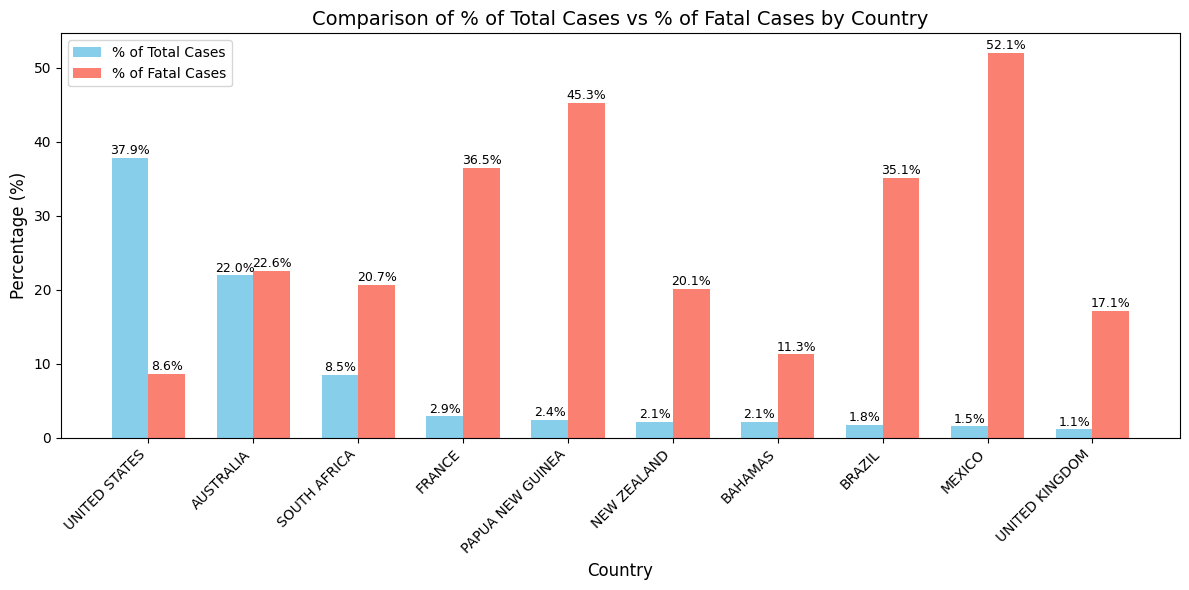

In [ ]:
# Graph to compare the % of Total cases vs. % of Fatal cases by country
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
countries = summary_top10.index
total_pct = summary_top10["Percentage_of_Total_Cases"]
fatal_pct = summary_top10["Fatal_Percentage"]

# Define bar width and positions
bar_width = 0.35
x = np.arange(len(countries))

# Create the plot
fig, ax = plt.subplots(figsize=(12,6))

# Plot bars
ax.bar(x - bar_width/2, total_pct, width=bar_width, label='% of Total Cases', color='skyblue')
ax.bar(x + bar_width/2, fatal_pct, width=bar_width, label='% of Fatal Cases', color='salmon')

# Add labels and title
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Comparison of % of Total Cases vs % of Fatal Cases by Country', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha='right')
ax.legend()

# Optional: show percentages on top of bars
for i in range(len(countries)):
    ax.text(x[i] - bar_width/2, total_pct[i] + 0.5, f'{total_pct[i]:.1f}%', ha='center', fontsize=9)
    ax.text(x[i] + bar_width/2, fatal_pct[i] + 0.5, f'{fatal_pct[i]:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
#Second, we need to know how many fatal cases have any country
fatal_by_country = fatal_cases["Country_new"].value_counts()

In [ ]:
#Now, we need to show the first 10 countries with more fatal cases:
fatal_by_country.head(10)

,count
Country_new,
AUSTRALIA,311
UNITED STATES,205
SOUTH AFRICA,110
PAPUA NEW GUINEA,68
FRANCE,66
MEXICO,50
BRAZIL,39
PHILIPPINES,37
NEW ZEALAND,27


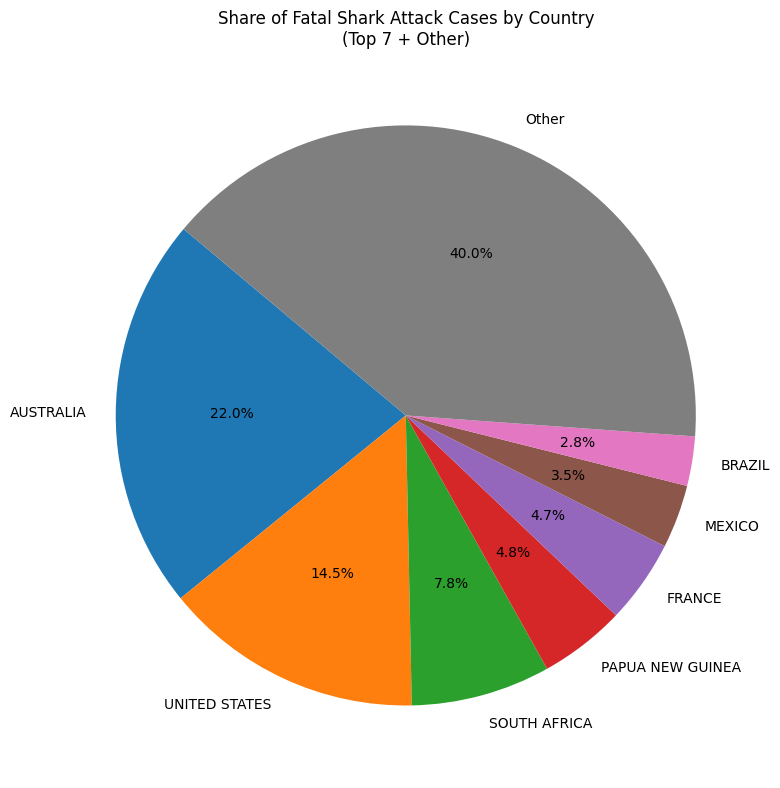

In [ ]:
#Creating a pie chart to show the top 7 countries with Fatal cases adn regroup the other countries to a section Others:
import pandas as pd
import matplotlib.pyplot as plt

#Select Top 7 countries by fatal cases
summary_sorted = summary.sort_values(by="Fatal_Cases", ascending=False)

top7 = summary_sorted.head(7)

# Group remaining countries into "Other"
others_percentage = summary_sorted.iloc[7:]["Fatal_Share_Global"].sum()

# Create pie chart data
pie_data = top7["Fatal_Share_Global"].copy()
pie_data["Other"] = others_percentage

# Create Pie Chart
plt.figure(figsize=(8, 8))

plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Share of Fatal Shark Attack Cases by Country\n(Top 7 + Other)")
plt.tight_layout()
plt.show()



Now, we want to check which activity has more fatal case.

In [ ]:
#Here we can see the number of the activity with the fatal cases.
df[df["Fatal_clean"] == "Y"]["Activity"].value_counts()

,count
Activity,
Swimming,326
Bathing,71
Surfing,65
Spearfishing,53
Fishing,51
...,...
In deep water about 100 yards from his ship,1
Swimming ashore from fishing boat swamped and sunk by a squall,1
Surfing on air mattress,1


In [ ]:
#we defined fatal_df and filter only for Y in fatal_clean column
fatal_df = df[df["Fatal_clean"] == "Y"]

In [ ]:
activity_percent = (fatal_df["Activity"].value_counts(normalize=True) * 100)
activity_percent


,proportion
Activity,
Swimming,23.657475
Bathing,5.152395
Surfing,4.716981
Spearfishing,3.846154
Fishing,3.701016
...,...
In deep water about 100 yards from his ship,0.072569
Swimming ashore from fishing boat swamped and sunk by a squall,0.072569
Surfing on air mattress,0.072569


Now, we want to check the country of the people who was swimming while Fatal case Y

In [ ]:
swim_fatal = df[(df["Fatal_clean"] == "Y") & (df["Activity"] == "Swimming")]

In [ ]:
swim_fatal["country_new"].value_counts()

,count
country_new,
AUSTRALIA,65
UNITED STATES,53
SOUTH AFRICA,36
BRAZIL,18
MEXICO,11
CROATIA,11
PAPUA NEW GUINEA,9
FRANCE,8
GREECE,8


Now, we want to check in Australia, United states and south africa, the activities and counts


In [ ]:
fatal_df = df[df["Fatal_clean"] == "Y"]


In [ ]:
countries = ["AUSTRALIA", "UNITED STATES", "SOUTH AFRICA"]

fatal_three = fatal_df[fatal_df["Country_new"].isin(countries)]

In [ ]:
fatal_three[fatal_three["Country_new"] == "AUSTRALIA"]["Activity"].value_counts()

,count
Activity,
Swimming,65
Surfing,26
Bathing,23
Fishing,8
Swimming,7
...,...
Trying to catch a wounded bird,1
Fell overboard from the Malacca,1
Fell overboard from the Sobella,1


In [ ]:
fatal_three[fatal_three["Country_new"] == "UNITED STATES"]["Activity"].value_counts()

,count
Activity,
Swimming,53
Surfing,11
Fishing,8
Snorkeling,6
Bathing,6
...,...
"Fishing from dory, shark upset boat & he fell into the water",1
Fell overboard from the ship Gem,1
Fell into the water,1


In [ ]:
fatal_three[fatal_three["Country_new"] == "SOUTH AFRICA"]["Activity"].value_counts()

,count
Activity,
Swimming,36
Surfing,8
Spearfishing,5
Body boarding,4
Fishing,3
Standing,3
Treading water,3
Swimming,3
Wading,2


In [ ]:
activity_country_percentage = (fatal_three.groupby("Country_new")["Activity"].value_counts(normalize=True) * 100)
activity_country_percentage

Country_new    Activity                                                         
AUSTRALIA      Swimming                                                             22.033898
               Surfing                                                               8.813559
               Bathing                                                               7.796610
               Fishing                                                               2.711864
               Pearl diving                                                          2.372881
                                                                                      ...    
UNITED STATES  Washed into sea while picking opihi & attacked by 2 large sharks      0.505051
               Washed off freighter Huncliff by a freak wave                         0.505051
               Wreck / Technical diving                                              0.505051
               Wreck of the Aphrodite                                                0.505051
               Wreck of the schooner Pohoiki                                         0.505051
Name: proportion, Length: 275, dtype: float64

In [ ]:
activity_country_percentage["AUSTRALIA"].head(4)

,proportion
Activity,
Swimming,22.033898
Surfing,8.813559
Bathing,7.796610
Fishing,2.711864


In [ ]:
activity_country_percentage["UNITED STATES"].head(4)

,proportion
Activity,
Swimming,26.767677
Surfing,5.555556
Fishing,4.040404
Bathing,3.030303


In [ ]:
activity_country_percentage["SOUTH AFRICA"].head(4)

,proportion
Activity,
Swimming,33.644860
Surfing,7.476636
Spearfishing,4.672897
Body boarding,3.738318


In [ ]:
fatal_percent = (fatal_df["Country_new"].value_counts(normalize=True) * 100)
fatal_percent

,proportion
Country_new,
AUSTRALIA,21.963277
UNITED STATES,14.477401
SOUTH AFRICA,7.768362
PAPUA NEW GUINEA,4.802260
FRANCE,4.661017
...,...
DENMARK,0.070621
DJIBOUTI,0.070621
BAHRAIN,0.070621


In [ ]:
fatal_percent.head(50)

,proportion
Country_new,
AUSTRALIA,21.963277
UNITED STATES,14.477401
SOUTH AFRICA,7.768362
PAPUA NEW GUINEA,4.802260
FRANCE,4.661017
MEXICO,3.531073
BRAZIL,2.754237
PHILIPPINES,2.612994
NEW ZEALAND,1.906780


In [ ]:
df["Country_new"].value_counts()

,count
Country_new,
UNITED STATES,2592
AUSTRALIA,1521
SOUTH AFRICA,599
FRANCE,191
PAPUA NEW GUINEA,154
...,...
GHANA,1
DENMARK,1
SWEDEN,1


In [ ]:
df[(df["Country_new"] == "FRANCE")]


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Case Number.1,original order,Unnamed: 21,Unnamed: 22,Date_clean,Month,Country_uppercase,Country_new,Fatal_uppercase,Fatal_clean
6,3rd January,2026,Provoked,New Caledonia,Kélé,Between Bourail and Moindou,Scuba Diving,Unknown,M,?,...,NaN,NaN,NaN,NaN,2026-01-03,January,NEW CALEDONIA,FRANCE,N,N
14,9th November,2025,Unprovoked,French Polynesia,Marquesas Islands,Hakahau Bay,Swimming,Not stated (Dentist),M,40,...,NaN,NaN,NaN,NaN,2025-11-09,November,FRENCH POLYNESIA,FRANCE,N,N
32,25th July,2025,Unprovoked,French Polynesia,Nuku Hiva,Taiohae Bay,Swimming,Male child,M,7,...,NaN,NaN,NaN,NaN,2025-07-25,July,FRENCH POLYNESIA,FRANCE,N,N
71,2-ene-25,2025,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,NaN,NaN,NaN,NaN,NaT,NaN,NEW CALEDONIA,FRANCE,Y,Y
110,23-may-24,2024,Unprovoked,French Polynesia,Gambier Islands,Mangareva Atoll,Freediving,Angus Kockott,M,20,...,NaN,NaN,NaN,NaN,NaT,NaN,FRENCH POLYNESIA,FRANCE,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6922,1700s,1700,Unprovoked,FRANCE,Côte d'Azur,Antibes,Bathing,seaman,M,NaN,...,1700.00.00.b,147.0,NaN,NaN,NaT,NaN,FRANCE,FRANCE,N,N
6934,Ca. 1554,1554,Unprovoked,FRANCE,Nice & Marseilles,NaN,NaN,males (wearing armor),M,NaN,...,1554.00.00,137.0,NaN,NaN,NaT,NaN,FRANCE,FRANCE,UNKNOWN,None
6986,No date,0000,Unprovoked,REUNION,Grand'Anse,Petite-île,yachtsman in a zodiac,NaN,M,NaN,...,ND.0096,85.0,NaN,NaN,NaT,NaN,REUNION,FRANCE,N,N
6989,"No date, Before Mar-1995",0000,Unprovoked,FRENCH POLYNESIA,Tuamotus,Rangiroa,Fishing,male,M,NaN,...,ND.0093,82.0,NaN,NaN,NaT,NaN,FRENCH POLYNESIA,FRANCE,N,N


In [ ]:
# Identify the top Months with the highest percentage of attack cases and the relates percentage of Fatal cases :
import numpy as np

df['Fatal_clean'] = df['Fatal_clean'].where(df['Fatal_clean'].isin(['Y', 'N']), np.nan)

# Drop rows with missing key values
df_clean = df.dropna(subset=['Month', 'Fatal_clean'])

# Group by Month
month_stats = (df_clean.groupby('Month').agg(Total_Cases=('Fatal_clean', 'count'), Fatal_Cases=('Fatal_clean', lambda x: (x == 'Y').sum())).reset_index()
)

# Calculate percentages
total_cases_all = month_stats['Total_Cases'].sum()
month_stats['Percentage_of_Total_Cases'] = month_stats['Total_Cases'] / total_cases_all * 100
month_stats['Percentage_of_Fatal_Cases'] = month_stats['Fatal_Cases'] / month_stats['Total_Cases'] * 100

# Sort by highest percentage of total cases
month_stats = month_stats.sort_values(by='Percentage_of_Total_Cases', ascending=False)

#Show the result
print(month_stats[['Month', 'Percentage_of_Total_Cases', 'Percentage_of_Fatal_Cases']])



       Month  Percentage_of_Total_Cases  Percentage_of_Fatal_Cases
3       July                  21.739130                  10.000000
6   November                  15.217391                  14.285714
2    January                  15.217391                  28.571429
0     August                  13.043478                   0.000000
1   December                   8.695652                  25.000000
4       June                   8.695652                   0.000000
8  September                   8.695652                  25.000000
7    October                   6.521739                   0.000000
5        May                   2.173913                   0.000000


In [ ]:
# Filter for Australia
df_aus = df_clean[df_clean['Country_new'] == 'AUSTRALIA']

#Group by Month
month_stats_aus = (
    df_aus
    .groupby('Month')
    .agg(
        Total_Cases=('Fatal_clean', 'count'),
        Fatal_Cases=('Fatal_clean', lambda x: (x == 'Y').sum())
    )
    .reset_index()
)

# Calculate percentages
total_cases_aus = month_stats_aus['Total_Cases'].sum()
month_stats_aus['Percentage_of_Total_Cases'] = month_stats_aus['Total_Cases'] / total_cases_aus * 100
month_stats_aus['Percentage_of_Fatal_Cases'] = month_stats_aus['Fatal_Cases'] / month_stats_aus['Total_Cases'] * 100

# Sort by highest % of total cases
month_stats_aus = month_stats_aus.sort_values(by='Percentage_of_Total_Cases', ascending=False)

# Show results
print(month_stats_aus[['Month', 'Percentage_of_Total_Cases', 'Percentage_of_Fatal_Cases']])



       Month  Percentage_of_Total_Cases  Percentage_of_Fatal_Cases
2    January                      31.25                  20.000000
5   November                      18.75                  33.333333
6    October                      12.50                   0.000000
0     August                      12.50                   0.000000
3       July                       6.25                   0.000000
1   December                       6.25                   0.000000
4       June                       6.25                   0.000000
7  September                       6.25                 100.000000


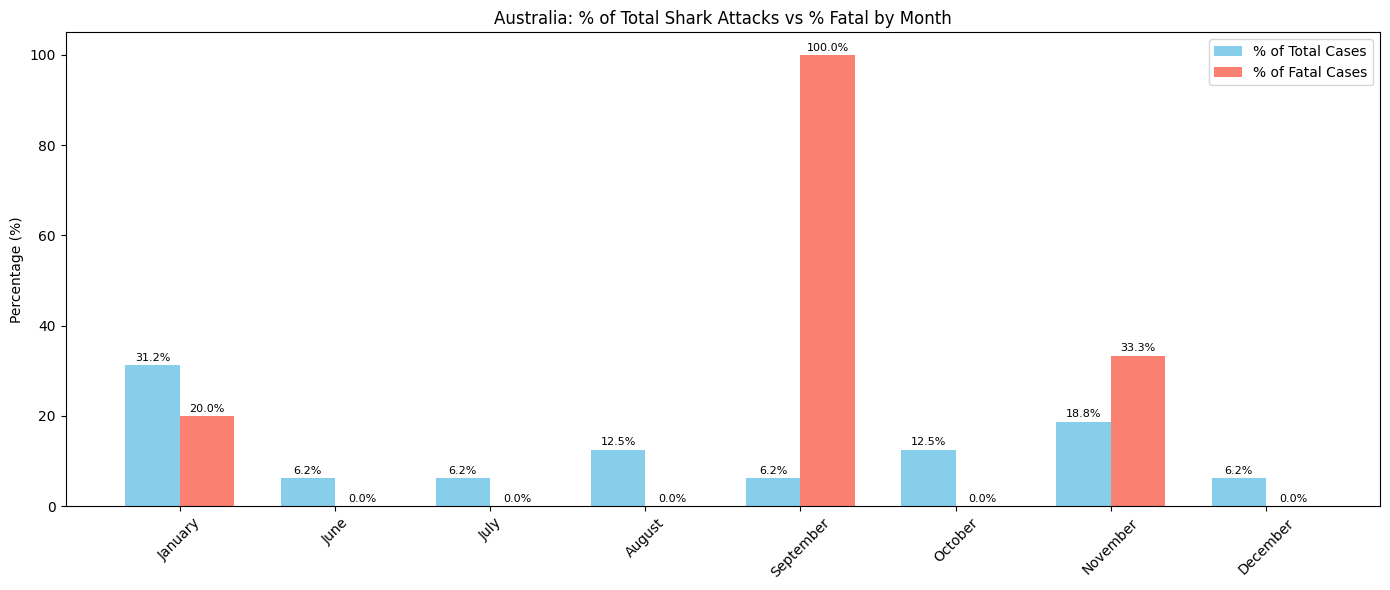

In [ ]:
#Creating a histogram to show the pecentage of total ceses (attacks) vs. percentage of fatal cases in Australia:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure chronological month order
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

month_stats_aus["Month"] = pd.Categorical(
    month_stats_aus["Month"],
    categories=month_order,
    ordered=True
)

month_stats_aus = month_stats_aus.sort_values("Month")

# Prepare data
months = month_stats_aus["Month"]
total_pct = month_stats_aus["Percentage_of_Total_Cases"]
fatal_pct = month_stats_aus["Percentage_of_Fatal_Cases"]

x = np.arange(len(months))
bar_width = 0.35

# Create figure
plt.figure(figsize=(14,6))

bars1 = plt.bar(x - bar_width/2, total_pct, width=bar_width,
                label='% of Total Cases', color='skyblue')

bars2 = plt.bar(x + bar_width/2, fatal_pct, width=bar_width,
                label='% of Fatal Cases', color='salmon')

# Add percentage labels on top of bars
for bar in bars1:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=8
    )

for bar in bars2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=8
    )

# Formatting
plt.xticks(x, months, rotation=45)
plt.ylabel("Percentage (%)")
plt.title("Australia: % of Total Shark Attacks vs % Fatal by Month")
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
#Show the percentage of activities with attacks cases >> the data is not very representative, probably some info by moth is missing:

# Filter for Australia and January
aus_jan = df_clean[
    (df_clean["Country_new"] == "AUSTRALIA") &
    (df_clean["Month"] == "January")
]

# Count total attacks in January
total_jan_cases = aus_jan.shape[0]

# Count attacks by activity
activity_counts = aus_jan["Activity"].value_counts()

# Calculate percentage of total January attacks
activity_percentages = (activity_counts / total_jan_cases) * 100

# Combine into a DataFrame for display
activity_summary = pd.DataFrame({
    "Total_Cases": activity_counts,
    "Percentage_of_January": activity_percentages.round(1)
})

# Show results
print(activity_summary)



                   Total_Cases  Percentage_of_January
Activity                                             
Surfing                      4                   80.0
Jumping off rocks            1                   20.0
